## Importação da imagem

In [ ]:
# Importação dos pacotes necessários para realização da atividade:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt


Dimensões da imagem original: (2208, 1242, 3)


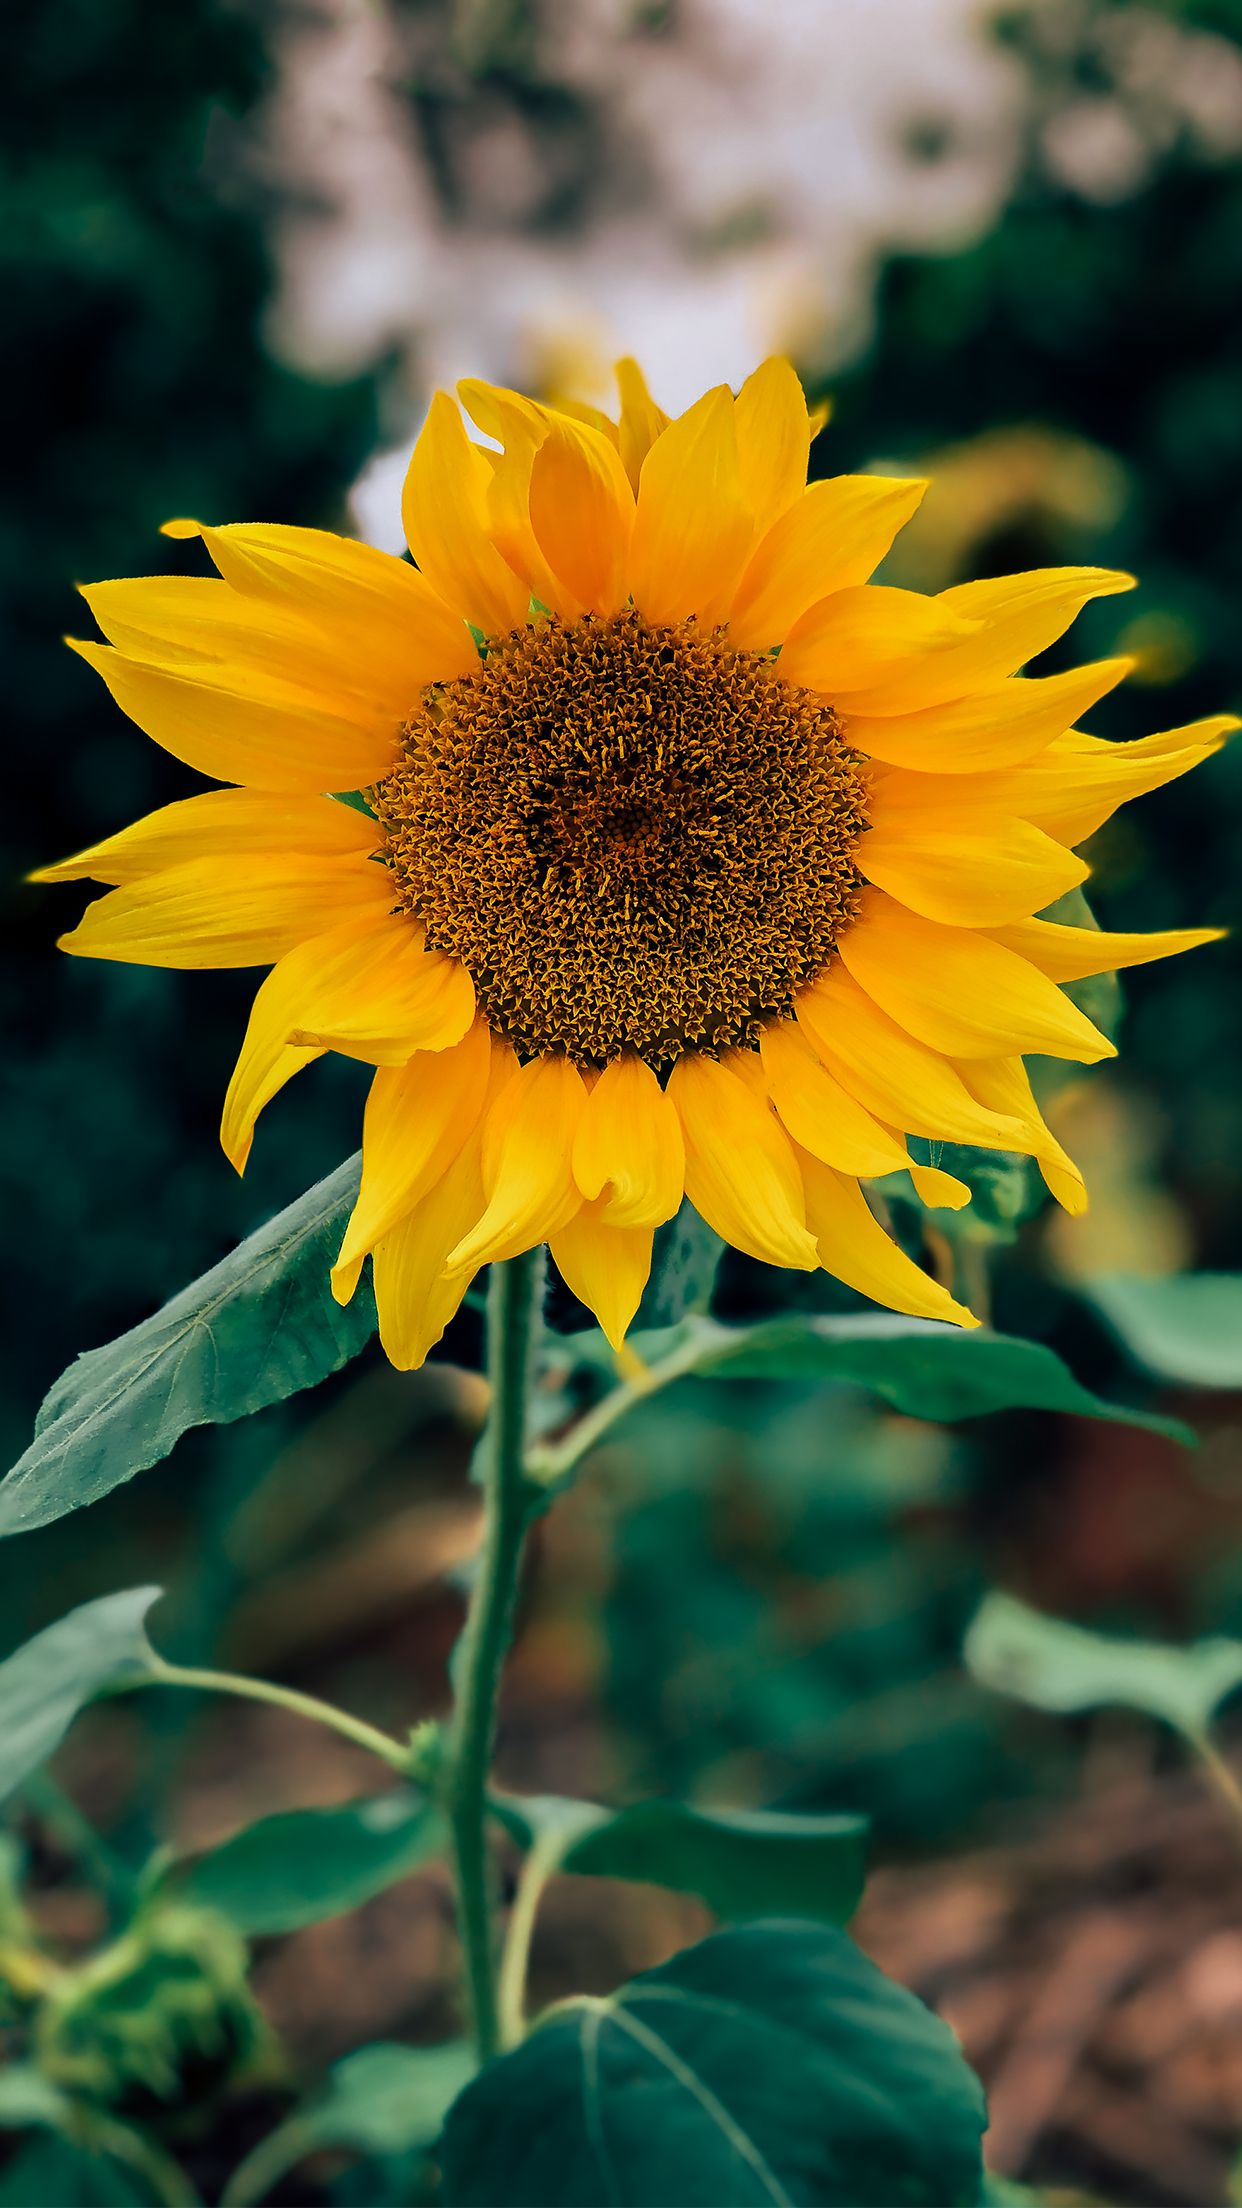

In [ ]:
# Leitura da imagem do diretório:

img_org = cv2.imread('/content/Girassol.jpg')

# Pritando as dimensões da imagem:

print('Dimensões da imagem original:',img_org.shape)

# Vizualiando a imagem original:

cv2_imshow(img_org)

Dimensões da imagem redimensionada: (200, 200, 3)


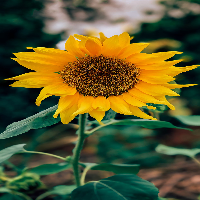

In [ ]:
# Realizando a redefinição da imagem original através do resize:

img = cv2.resize(img_org, (200, 200))

# Mostrando as novas dimensões:

print('Dimensões da imagem redimensionada:',img.shape)

# Apresentar a imagem redimensionada:

cv2_imshow(img)

In [ ]:
# Apresentando o kernel:
print('O kernel não deve ser maior ou igual a imagem')

# Definindo o tamanho desse kernel:
kernel = int(input('Defina o tamanho do kernel:'))

# Verificando se as dimensões dele são iguais ou maiores que as dimensões da imagem:
while kernel >= img.shape[0]:
  # Se sim, informe outro valor:
   kernel = int(input())

# Mostrando as dimensões do kernel:
print('O kernel que será aplicado na imagem é :', kernel,'X',kernel)


#Mostrando o kernel em forma de matriz, e inserindo números aleatórios(0 e 1) a essa matriz:

kernel_matrix = []
kernel_matrix1 = []
for i in range(kernel):
  linha = []
  for j in range(kernel):
     aleatorio = random.randint(0,1)
     kernel_matrix1.append(aleatorio)
     linha.append(aleatorio)
  kernel_matrix.append(linha)

# Printando o kernel em forma de matriz:
print(kernel_matrix)

O kernel não deve ser maior ou igual a imagem
Defina o tamanho do kernel:3
O kernel que será aplicado na imagem é : 3 X 3
[[0, 1, 1], [1, 0, 0], [0, 0, 1]]


In [ ]:
# Pondo o kernel em formato de array:

kernel_matrix = np.array(kernel_matrix)

# Mostrando o kernel em forma de Dataframe, para uma melhor vizualização:
matrix = pd.DataFrame(kernel_matrix)
matrix

,0,1,2
0,0,1,1
1,1,0,0
2,0,0,1


In [ ]:
# Printando a matriz da imagem:
print(len(img))

200


In [ ]:
# Printando a matriz do kernel:
k_size = len(kernel_matrix)
k_size

3

In [ ]:
# Realizando a leitura do pixels da imagem
line = []
# Retirando-os das matrizes:
for j in range(len(img)):
  line.append([])
  for a in range(len(img)):
    # Atribuindo os valores dos elementos retirando às posições RGB para em seguida realizar a média:
     r = img[j][a][0]
     g = img[j][a][1]
     b = img[j][a][2]
     # Realizando a média do pixel:
     media = (r+g+b)/3.0
     # Considerando a média como int, evitando númerações do tipo float:
     line[j].append(int(media))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


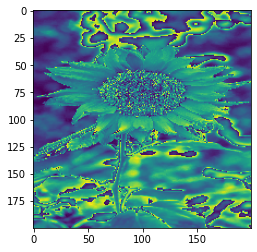

In [ ]:
# Verificando como o imagem está retornando:
plt.imshow(line)

In [ ]:
# Passando o kernel na matriz da média dos pixels, feita anteriormente:
matrix = []
for coluna in range(len(line)-k_size):
  matrix.append([])
  for linha in range(len(line[0])-k_size):
        sum_ = 0
        for linha_k in range(k_size):
          sum_ = sum_+ np.sum(line[coluna+linha_k][linha:linha+k_size] * kernel_matrix[linha_k])
        matrix[coluna].append(sum_)

In [ ]:
print(kernel_matrix[linha_k])

[0 0 1]


In [ ]:
print(line[coluna][linha])

56


In [ ]:
print(len(line[0]))

200


## Mudança da cor

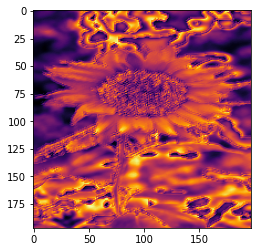

In [ ]:
plt.imshow(matrix, cmap='inferno')

In [ ]:
novo = np.array([matrix])
print(novo.shape)
print(kernel_matrix.shape)

(1, 197, 197)
(3, 3)
